#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

#Load Dataset

In [2]:
df = pd.read_excel(r"C:\Users\rajar\OneDrive\Desktop\Advanced_Retail_Sales_Project_Dataset.xlsx")

df.head()

,Order ID,Customer ID,Order Date,Ship Mode,Segment,Region,State,City,Category,Sub-Category,Quantity,Sales,Discount,Profit
0,ORD-10000,CUST-734,2024-05-10,Same Day,Home Office,Central,Maharashtra,Mumbai,Furniture,Tables,1,4334.94,0.26,-309.66
1,ORD-10001,CUST-988,2024-11-10,Same Day,Corporate,East,Maharashtra,New Delhi,Office Supplies,Binders,2,2411.52,0.30,116.70
2,ORD-10002,CUST-485,2022-05-02,First Class,Corporate,West,Karnataka,Mumbai,Furniture,Bookcases,7,3821.93,0.07,314.34
3,ORD-10003,CUST-242,2023-04-12,Standard Class,Corporate,South,Tamil Nadu,Kochi,Office Supplies,Storage,1,4316.15,0.03,616.40
4,ORD-10004,CUST-396,2022-11-27,Standard Class,Corporate,South,Karnataka,New Delhi,Technology,Copiers,9,233.51,0.12,-3.67


In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      5000 non-null   object        
 1   Customer ID   5000 non-null   object        
 2   Order Date    5000 non-null   datetime64[ns]
 3   Ship Mode     5000 non-null   object        
 4   Segment       5000 non-null   object        
 5   Region        5000 non-null   object        
 6   State         5000 non-null   object        
 7   City          5000 non-null   object        
 8   Category      5000 non-null   object        
 9   Sub-Category  5000 non-null   object        
 10  Quantity      5000 non-null   int64         
 11  Sales         5000 non-null   float64       
 12  Discount      5000 non-null   float64       
 13  Profit        5000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(9)
memory usage: 547.0+ KB


Order ID        0
Customer ID     0
Order Date      0
Ship Mode       0
Segment         0
Region          0
State           0
City            0
Category        0
Sub-Category    0
Quantity        0
Sales           0
Discount        0
Profit          0
dtype: int64

#Data Cleaning

#Data Cleaning

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

#Exploratory Data Analysis

In [5]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

print("Total Sales:", total_sales)
print("Total Profit:", total_profit)

Total Sales: 13155258.829999998
Total Profit: 839746.3600000001


In [6]:
profit_margin = (total_profit / total_sales) * 100
print("Profit Margin %:", round(profit_margin,2))

Profit Margin %: 6.38


#Monthly Sales Trend

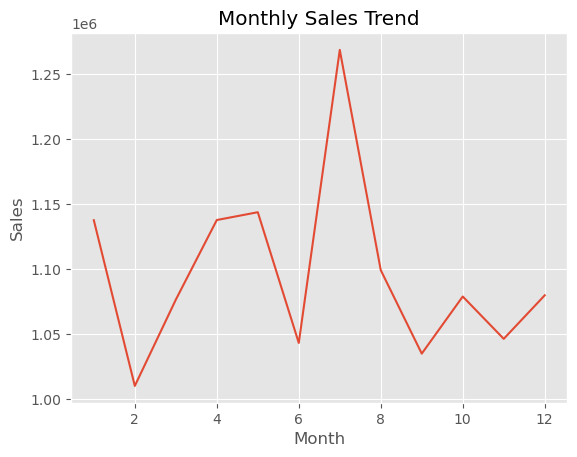

In [7]:
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

#Sales by Category

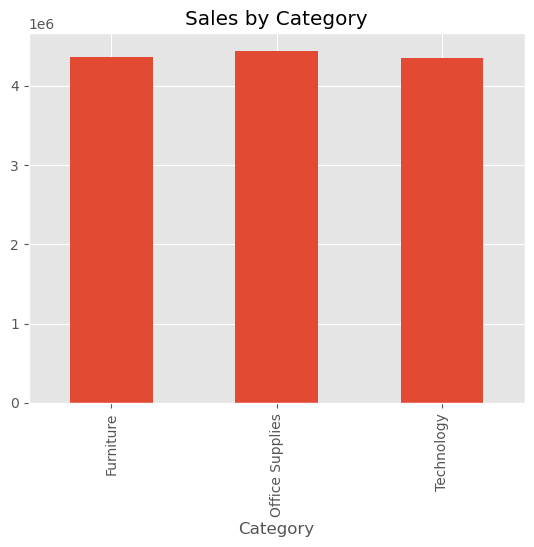

In [8]:
category_sales = df.groupby('Category')['Sales'].sum()

plt.figure()
category_sales.plot(kind='bar')
plt.title("Sales by Category")
plt.show()

#Profit by Region

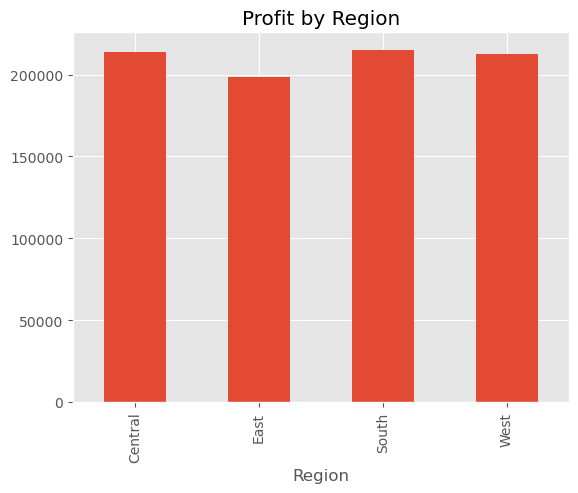

In [9]:
region_profit = df.groupby('Region')['Profit'].sum()

plt.figure()
region_profit.plot(kind='bar')
plt.title("Profit by Region")
plt.show()

#Discount Impact on Profit

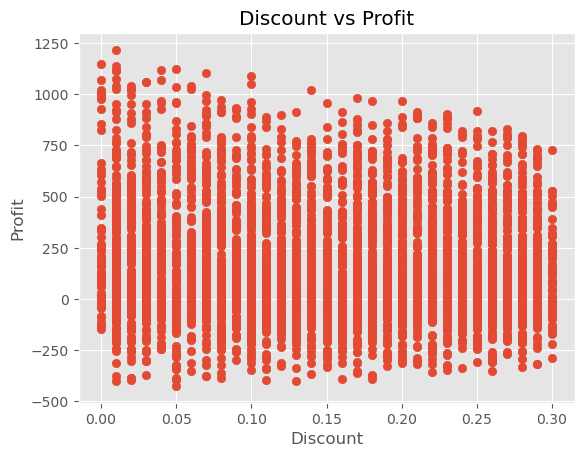

In [10]:
plt.figure()
plt.scatter(df['Discount'], df['Profit'])
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

#Top 10 Loss Making Sub-Categories

In [11]:
loss_products = df.groupby('Sub-Category')['Profit'].sum().sort_values().head(10)
loss_products

Sub-Category
Bookcases       78827.94
Paper           88657.92
Accessories     90276.23
Storage         91334.93
Phones          93934.48
Copiers         96207.94
Tables          96912.38
Chairs          99365.45
Binders        104229.09
Name: Profit, dtype: float64

#data-based insights

In [12]:
top_category = df.groupby('Category')['Sales'].sum().idxmax()
top_region = df.groupby('Region')['Profit'].sum().idxmax()
loss_sub = df.groupby('Sub-Category')['Profit'].sum().idxmin()
correlation = df['Discount'].corr(df['Profit'])

print(f"""
Key Insights:
1. Highest Sales Category: {top_category}
2. Most Profitable Region: {top_region}
3. Highest Loss Sub-Category: {loss_sub}
4. Discount-Profit Correlation: {round(correlation,2)}
""")


Key Insights:
1. Highest Sales Category: Office Supplies
2. Most Profitable Region: South
3. Highest Loss Sub-Category: Bookcases
4. Discount-Profit Correlation: -0.08



#Correlation Heatmap

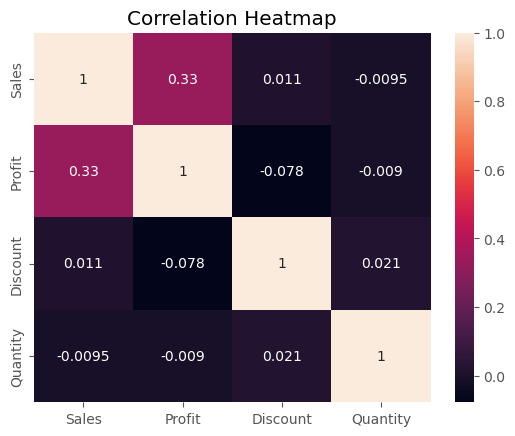

In [13]:
import seaborn as sns
plt.figure()
sns.heatmap(df[['Sales','Profit','Discount','Quantity']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

#Year-wise Sales Growth

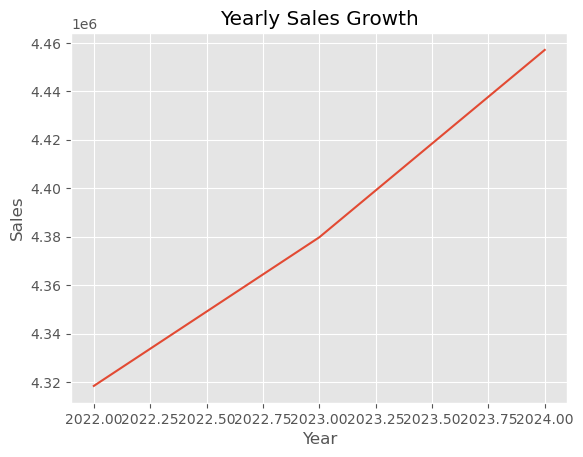

In [14]:
yearly_sales = df.groupby('Year')['Sales'].sum()

plt.figure()
yearly_sales.plot()
plt.title("Yearly Sales Growth")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

#Customer Contribution Analysis

In [15]:
top_customers = df.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False).head()
top_customers

Customer ID
CUST-792    41873.77
CUST-279    39887.20
CUST-123    38856.00
CUST-196    37889.53
CUST-428    37875.10
Name: Sales, dtype: float64

#Segment Performance

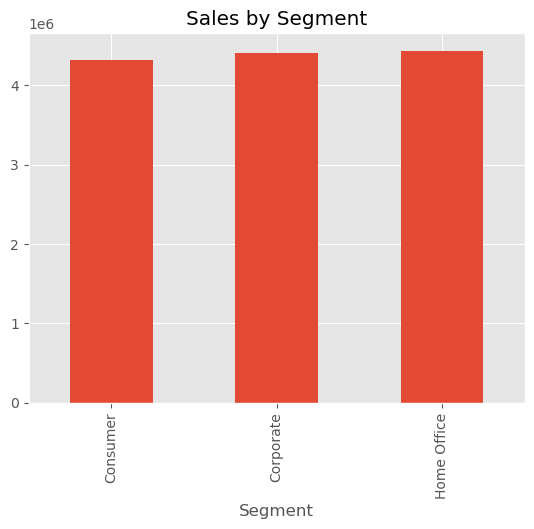

In [16]:
segment_sales = df.groupby('Segment')['Sales'].sum()

plt.figure()
segment_sales.plot(kind='bar')
plt.title("Sales by Segment")
plt.show()